# Importing Libraries

In [1]:
#data preprocessing
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#Algorithms
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from pandas import Series, DataFrame
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn import metrics  
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder


import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
flight=pd.read_excel('Data_Train.xlsx')
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Statistical Description

In [3]:
flight.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Here we can observe one thing minimum flight price is 1759 and maximum is 79512.

In [4]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Here we can observe price is in integer format and other than price ever other feature is in object format.

In [5]:
flight.shape

(10683, 11)

flight data has 11 features and 10683 rows .

# Cleaning data

In [6]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Route and Total_Stops contains missing data and it's better to clear this missing values.

In [7]:
flight['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

going ot fill missing value with most common stop

In [8]:
flight['Total_Stops']=flight['Total_Stops'].fillna('1 stop')

Route column also has missing values and going to fill with most common route.

In [9]:
flight['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → BLR → CCU → BBI → HYD       1
CCU → IXB → DEL → BLR             1
BOM → COK → MAA → HYD             1
BOM → RPR → VTZ → HYD             1
CCU → IXZ → MAA → BLR             1
Name: Route, Length: 128, dtype: int64

In [10]:
flight['Route']=flight['Route'].fillna('DEL → BOM → COK')

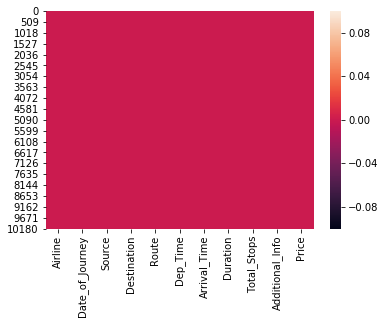

In [11]:
#check still any missing values present or not
sns.heatmap(flight.isnull())

Now you can see here there is no missing data present here .

### Date_of_Journey

In [12]:
#cleaning date of journey column
flight['Journey_Day'] = pd.to_datetime(flight.Date_of_Journey, format='%d/%m/%Y').dt.day

flight['Journey_Month'] = pd.to_datetime(flight.Date_of_Journey, format='%d/%m/%Y').dt.month

In [13]:
#compare with original date column and drop 
flight.drop('Date_of_Journey',axis=1,inplace=True)

In [14]:
#check weather column is droped or not
flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Here you can see column had been droped.

### Duration

In [15]:
duration = list(flight['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
flight['Duration_hour']=dur_hours
flight['Duration_min']=dur_minutes

In [16]:
#lets check features are added or not
flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4,45


Here you can observe the other two features had been added .

In [17]:
#dropping duratin feature
flight.drop('Duration',axis=1,inplace=True)

In [18]:
#let's check once again feature drop or not
flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,4,45


Feature had been droped and  it's perfect now

### Arrival Time

In [19]:
flight['arrival_hr']=pd.to_datetime(flight.Arrival_Time).dt.hour
flight['arrival_min']=pd.to_datetime(flight.Arrival_Time).dt.minute

In [20]:
#let's check to features are added or not
flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hour,Duration_min,arrival_hr,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2,50,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,7,25,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,19,0,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,5,25,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,4,45,21,35


Here you can observe two new features had been added.

In [21]:
#drop arrival time features from the dataset
flight.drop('Arrival_Time',axis=1,inplace=True)

### Departure Time

In [22]:
flight['dep_hour']=pd.to_datetime(flight.Dep_Time).dt.hour
flight['dep_min']=pd.to_datetime(flight.Dep_Time).dt.minute

In [23]:
#Drop departure time feature
flight.drop('Dep_Time',axis=1,inplace=True)

In [24]:
#let's check once
flight.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hour,Duration_min,arrival_hr,arrival_min,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,7,25,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,19,0,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,5,25,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,4,45,21,35,16,50


# Exploratory Data Analysis

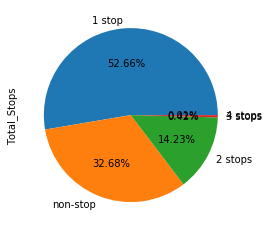

In [25]:
flight['Total_Stops'].value_counts().plot.pie(autopct="%2.2f%%")

Here you can see out of 100% 52 % of stops are belongs to 1 stop and 32% of stops are belongs to no-stop ,14 % are belongs to 2 stops ,rest of are 3 stops.

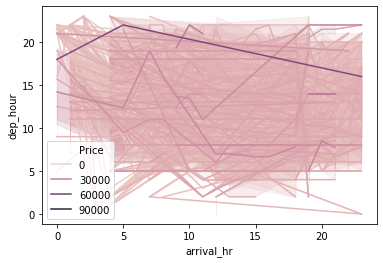

In [26]:
sns.lineplot(x='arrival_hr',y='dep_hour',hue='Price',data=flight)

From here we can observe that one thing where dep-hour is in between(15-18) hours arrival time at  any time the price of flight ticket is more than 90000.

Text(0.5, 1.0, 'Route')

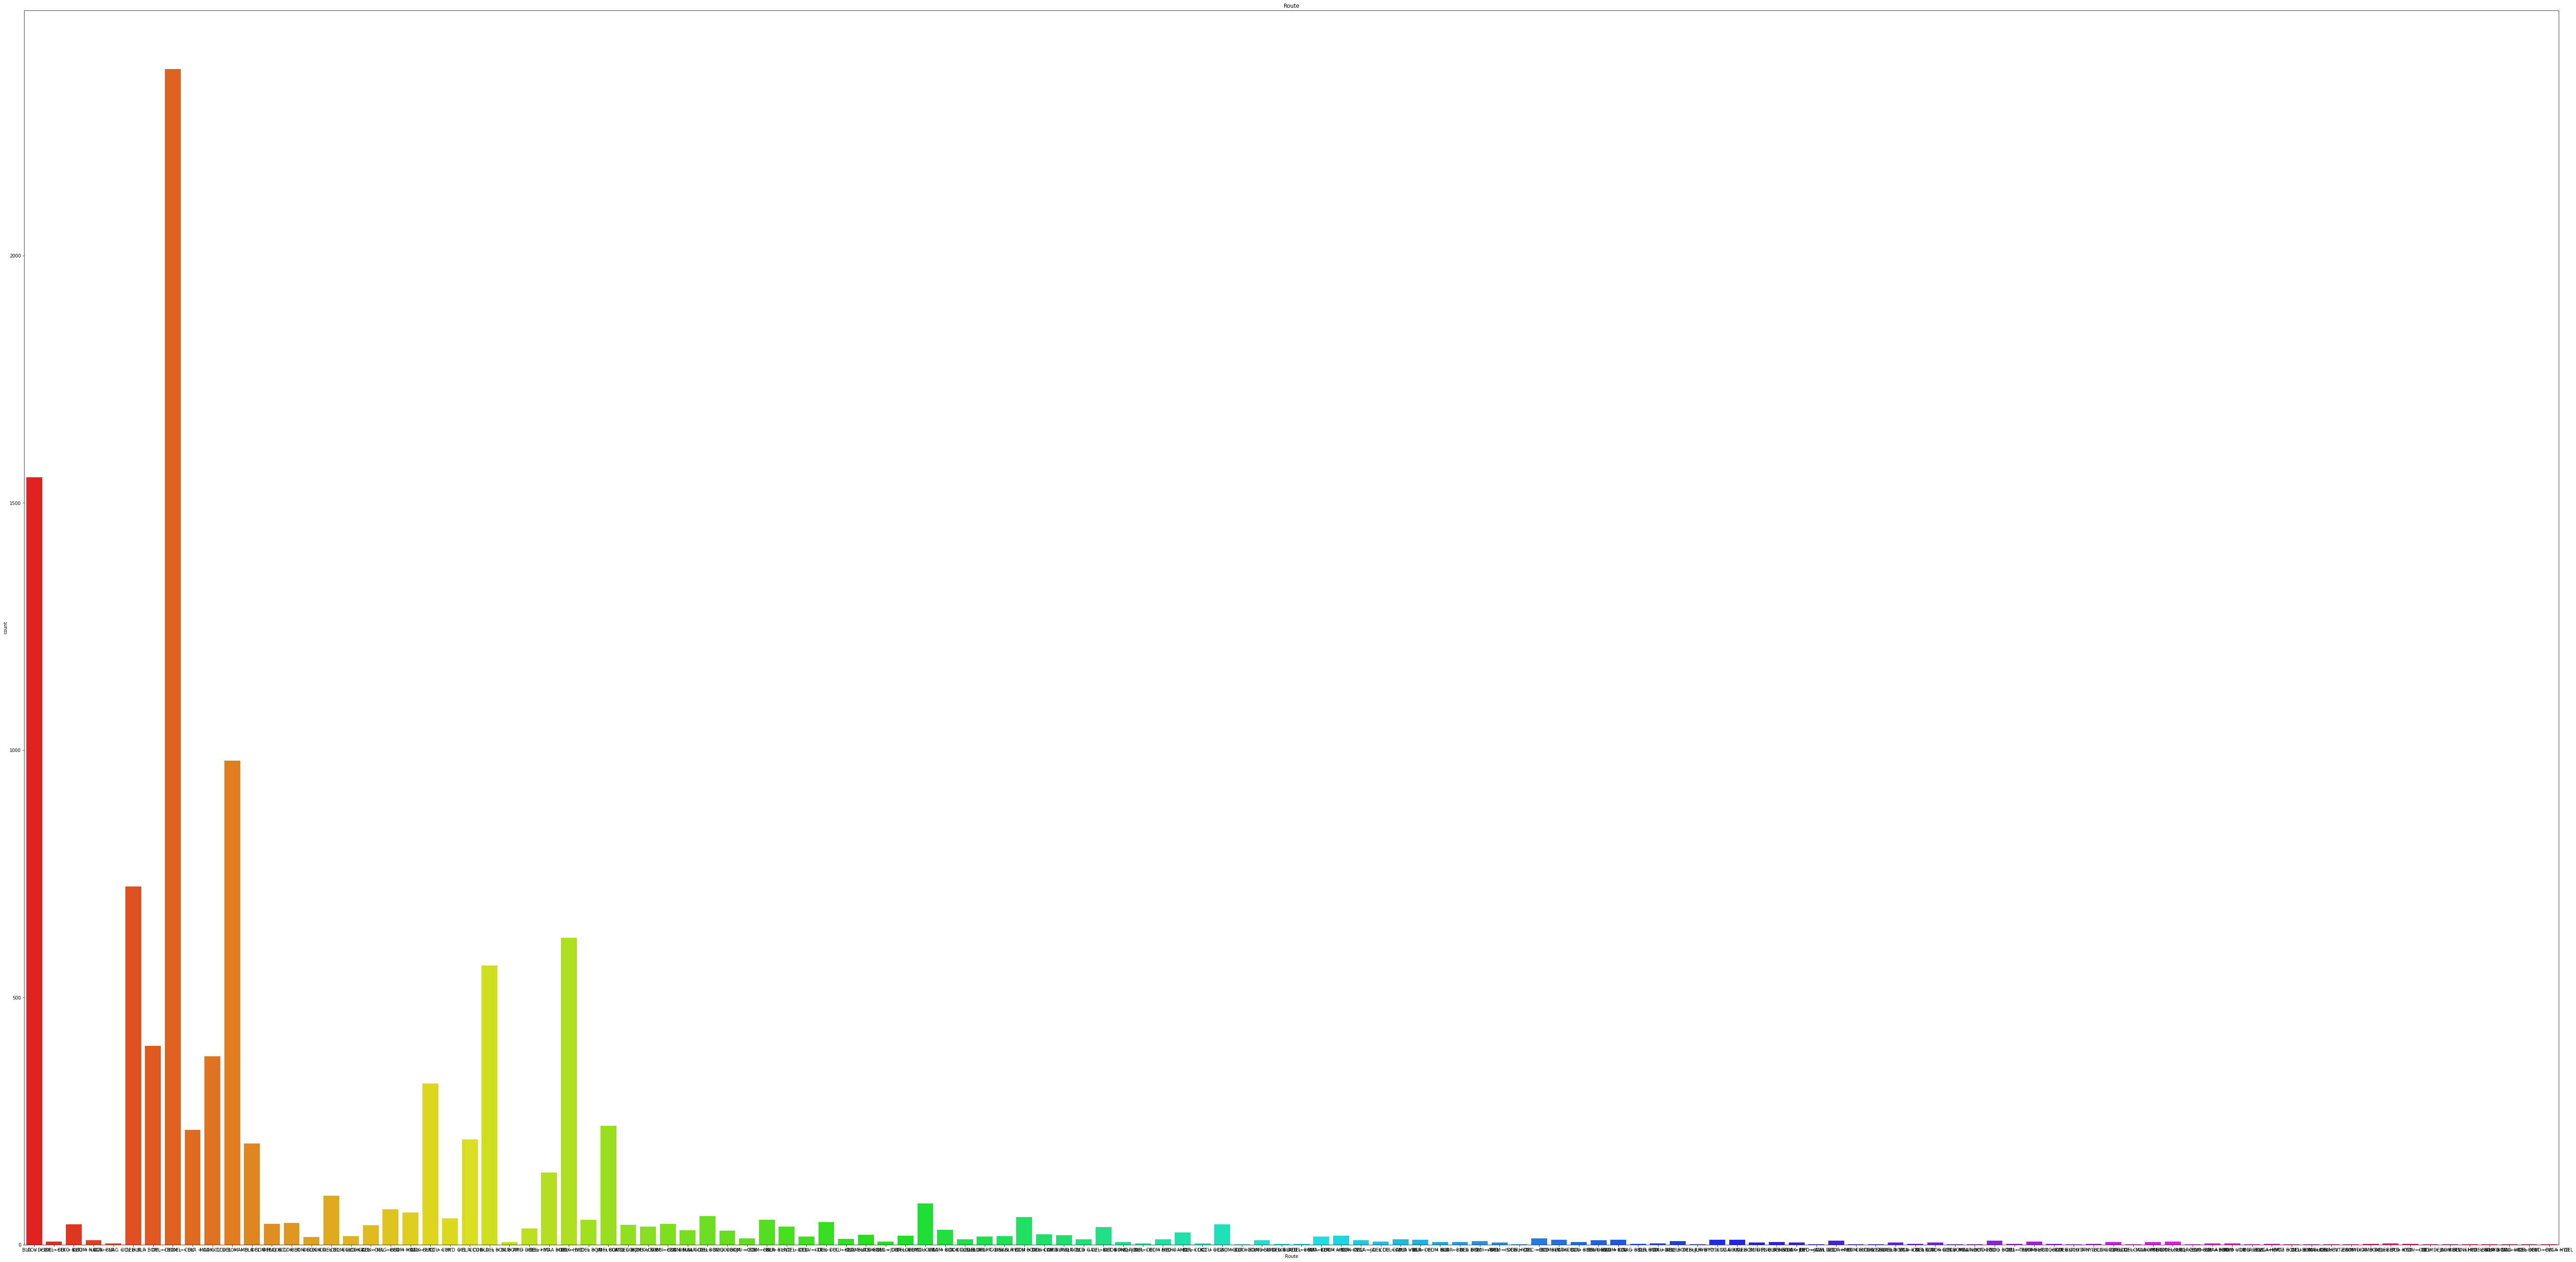

In [27]:
plt.figure(figsize=(100,50))
sns.countplot(flight['Route'],palette='hsv')
plt.title("Route")

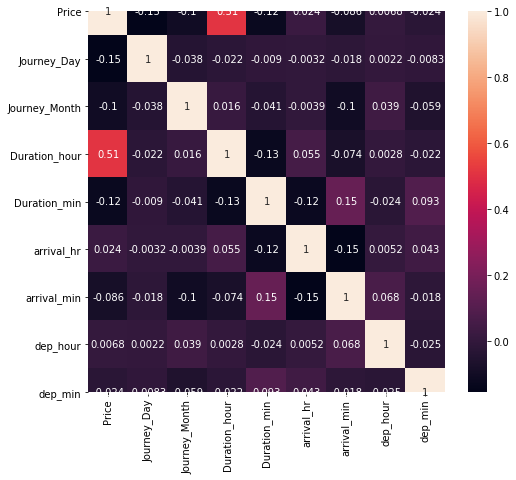

In [28]:
#check cor-relation
corr_hmap=flight.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

# Data Preprocessing

* From here categorise dependent and in-dependent variables
* And price is dependent variable and other than price all other features are in-dependent variables.

### Encoding Features

In [29]:
le=LabelEncoder()
list=flight.columns
for val in list:
    flight[val]=le.fit_transform(flight[val].astype(str))

In [30]:
flight.loc[(flight['Price']>0) & (flight['Price']<=500),'Price']=0
flight.loc[(flight['Price']>500) & (flight['Price']<=1000),'Price']=1
flight.loc[(flight['Price']>1000) & (flight['Price']<=1500),'Price']=2
flight.loc[flight['Price']>1500,'Price']=3


In [31]:
flight['Price'].value_counts()

1    3537
2    2831
0    2732
3    1583
Name: Price, dtype: int64

In [32]:
#let's check data
flight.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hour,Duration_min,arrival_hr,arrival_min,dep_hour,dep_min
0,3,0,5,18,4,8,1,5,0,12,10,1,1,15,3
1,1,3,0,84,1,8,3,0,2,41,4,5,2,19,10
2,4,2,1,118,1,8,1,9,3,11,0,18,4,23,4
3,3,3,0,91,0,8,2,1,2,39,4,16,5,10,9
4,3,0,5,29,0,8,0,0,0,34,8,14,6,8,10


Now you can see how the data looks like.It's good up to now

In [33]:
x=flight.drop('Price',axis=1)
x.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hour,Duration_min,arrival_hr,arrival_min,dep_hour,dep_min
0,3,0,5,18,4,8,5,0,12,10,1,1,15,3
1,1,3,0,84,1,8,0,2,41,4,5,2,19,10
2,4,2,1,118,1,8,9,3,11,0,18,4,23,4
3,3,3,0,91,0,8,1,2,39,4,16,5,10,9
4,3,0,5,29,0,8,0,0,34,8,14,6,8,10


In [34]:
y=flight['Price']
y.head()

0    1
1    3
2    1
3    2
4    0
Name: Price, dtype: int32

# Building a Machine Learning Model

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [36]:
x_train.shape

(9614, 14)

In [37]:
y_train.shape

(9614,)

In [38]:
x_test.shape

(1069, 14)

In [39]:
y_test.shape

(1069,)

In [40]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()

In [41]:
y_train = y_train.ravel()

In [42]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [43]:
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
lg=LogisticRegression()

In [44]:
#prepare models
models=[]
models.append(('DecisionTreeRegressor',dtr))
models.append(('RandomForestRegressor',rfr))
models.append(('LogisticRegression',lg))
#evaluate each model
Model=[]
Score=[]
MAE=[]
MSE=[]
RMSE=[]
RSquare=[]
for name,model in models:
    print('***********************',name,'************')
    Model.append(name)
    print('\n')
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    sr=model.score(x_train,y_train)
    print('score',sr)
    Score.append(sr*100)
    print('\n')
    print('Performance Measures:')
    mae=metrics.mean_absolute_error(y_test, pred)
    print('MAE',mae)
    MAE.append(mae)
    mse=metrics.mean_squared_error(y_test, pred)
    print('MSE',mse)
    MSE.append(mse)
    rmse=np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE',rmse)
    RMSE.append(rmse)
    rsquare=metrics.r2_score(y_test,pred)
    print('R-square',rsquare)
    RSquare.append(rsquare)

*********************** DecisionTreeRegressor ************


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


score 0.9798912240956177


Performance Measures:
MAE 0.28032429061428127
MSE 0.560596611578838
RMSE 0.7487299991177313
R-square 0.4340952504903136
*********************** RandomForestRegressor ************


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=No

In [45]:
result=pd.DataFrame({'models':Model,'score':Score,'MAE':MAE,'MSE':MSE,'RMSE':RMSE,'RSquare':RSquare},columns=['models','score','MAE','MSE','RMSE','RSquare'])
result

,models,score,MAE,MSE,RMSE,RSquare
0,DecisionTreeRegressor,97.989122,0.280324,0.560597,0.748730,0.434095
1,RandomForestRegressor,92.697649,0.307744,0.350281,0.591845,0.646403
2,LogisticRegression,45.631371,0.879326,1.668849,1.291840,-0.684651


From above you can observe that RandomForestRegressor is best compare to all other models .and RSquare is also best compare to other models.

# Predicting Data

In [50]:
pred_rfr=rfr.predict(x_test)
print("predicted price",pred_rfr)
print("actual price",y_test)

predicted price [0.  1.4 1.  ... 1.  0.3 0.6]
actual price 6076    0
3544    2
7313    1
5032    1
2483    0
       ..
7481    2
9531    1
9512    1
1862    0
8719    0
Name: Price, Length: 1069, dtype: int32


# Saving Model

In [51]:
x=pd.DataFrame(pred_dtr)
x.to_csv('decision_automobile.csv')

In [52]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(dtr,'flight.obj')
#load the model from a file
dtr_from_joblib=joblib.load('flight.obj')
#use the loaded model to make prediction
dtr_from_joblib.predict(x_test)

array([0., 2., 1., ..., 1., 0., 3.])

It's done upto now